In [ ]:
!pip install python_speech_features

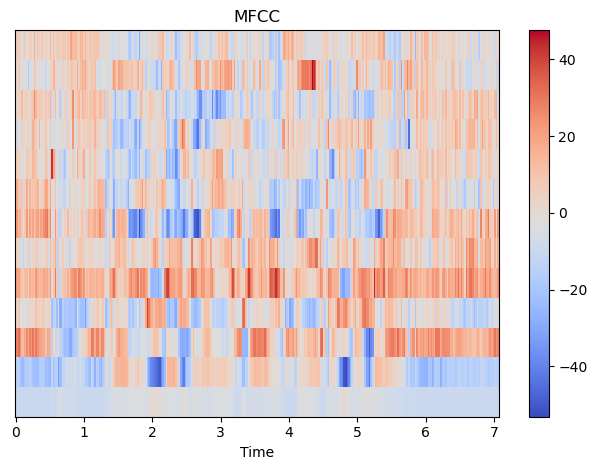

In [1]:
import librosa
from python_speech_features import mfcc

def compute_mfcc(audio_data, sample_rate):
    #audio_data = audio_data - np.mean(audio_data)
    #audio_data = audio_data / np.max(audio_data)
    mfcc_feat = mfcc(audio_data, sample_rate, winlen=0.010, winstep=0.01,
                     numcep=13, nfilt=26, nfft=512, lowfreq=0, highfreq=None,
                     preemph=0.97, ceplifter=22, appendEnergy=True)
    return mfcc_feat 

audio_sample, sampling_rate = librosa.load("test_voice.wav", sr = None)
mfcc = compute_mfcc(audio_sample, sampling_rate)

import matplotlib.pyplot as plt
import librosa.display
librosa.display.specshow(mfcc.T, x_axis='time')

plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [2]:
mfcc

array([[ -9.64533359, -17.94758796,  13.60794809, ...,   7.4422349 ,
          4.53651635,   5.44312254],
       [ -9.24645364, -13.13960429,  26.87111193, ...,   0.99335396,
          0.15931691,   5.55705293],
       [ -9.55519533, -14.79633458,  32.22842137, ...,   4.05804536,
          7.45224214,   7.78422354],
       ...,
       [ -9.48767548, -13.11720397,  30.17646884, ...,  13.20539431,
         -3.81469548,  -9.44288003],
       [ -9.34519463, -13.98457734,  23.59027136, ...,  15.43637098,
          8.12670401,   5.40064861],
       [ -9.6601834 , -17.1482247 ,  26.96717976, ...,  -7.5355772 ,
        -12.31623496,  -2.00121128]])

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import os

# 데이터셋 경로 설정
data_dir = 'archive/Actor_01'
emotion_dict = {'01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad', '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised'}

# 데이터셋 로딩 및 전처리
X = []
y = []
for subdir, _, files in os.walk(data_dir):
    for file in files:
        if file.endswith('.wav'):
            filepath = os.path.join(subdir, file)
            filename = os.path.basename(filepath)
            emotion = emotion_dict[filename.split('-')[2]]
            y.append(emotion)
            audio_data, _ = librosa.load(filepath, sr=22050, duration=2.5, offset=0.5)
            mfcc = librosa.feature.mfcc(y = audio_data, sr=22050, n_mfcc=13)
            X.append(mfcc)

X = np.array(X)
y = np.array(y)

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MLP 분류기 모델 생성 및 학습
model = MLPClassifier(hidden_layer_sizes=(256, 256), activation='relu', solver='adam', max_iter=500, random_state=42)
model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# 모델 평가
y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)



Accuracy: 0.5


In [24]:
X_train[0].argmax(axis = 1)

array([23, 89, 58, 82, 80, 38, 30, 26, 20, 96, 73, 44, 92], dtype=int64)

[Text(0.5, 1.0, 'MFCC')]

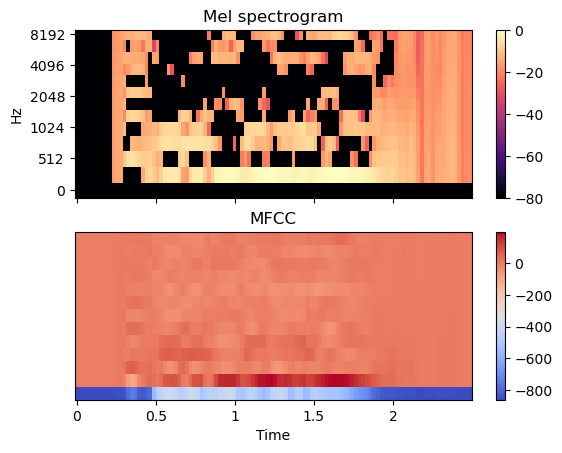

In [28]:
import matplotlib.pyplot as plt
>>> fig, ax = plt.subplots(nrows=2, sharex=True)
>>> img = librosa.display.specshow(librosa.power_to_db(X[0], ref=np.max),
...                                x_axis='time', y_axis='mel', fmax=8000,
...                                ax=ax[0])
>>> fig.colorbar(img, ax=[ax[0]])
>>> ax[0].set(title='Mel spectrogram')
>>> ax[0].label_outer()
>>> img = librosa.display.specshow(X[0], x_axis='time', ax=ax[1])
>>> fig.colorbar(img, ax=[ax[1]])
>>> ax[1].set(title='MFCC')

## 감정 분류 예측

In [16]:
filepath = '03-01-02-01-01-02-03.wav'
audio_data, _ = librosa.load(filepath, sr=22050, duration=2.5, offset=0.5)
mfcc = librosa.feature.mfcc(y = audio_data, sr=22050, n_mfcc=13)
emotion = model.predict(mfcc.reshape(1, -1))[0]
print('Emotion:', emotion)

Emotion: surprised
